In [3]:
from bs4 import BeautifulSoup, Tag, NavigableString
from collections import defaultdict
import re
from itertools import islice
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from googletrans import Translator

In [4]:
drop_dict_list = [
    'Meine Werkzeuge', 'Namensräume', 'Ansichten', 'Navigation', 'Mitmachen', 'Werkzeuge',
    'Drucken/\u200bexportieren', 'In anderen Projekten', 'In anderen Sprachen'
]

def translate_german_to_english(text):
    translator = Translator(service_urls=['translate.google.com'])
    translated_text = translator.translate(text, src='de', dest='en')
    return translated_text.text

def count_items(html_content):
    translator = Translator(service_urls=['translate.google.com'])
    soup = BeautifulSoup(html_content, 'html.parser')
    string_soup = str(soup)
    category_dict ={}
    split_pattern = r'(<p><b>(?!<))'
    drop_topic_list = [
        'Meine Werkzeuge', 'Namensräume', 'Ansichten', 'Navigation', 'Mitmachen', 'Werkzeuge',
        'Drucken/\u200bexportieren', 'In anderen Projekten', 'In anderen Sprachen'
    ]
    # Split the text using the regex pattern and preserve the split value
    split_text = re.split(split_pattern, string_soup)

    split_text = [s for s in split_text if s]

    for text in split_text:
        if ':</b>' not in text:
            continue
        current_count = text.count('<a href="/wiki/')
        current_split = text.split(':</b>')
        current_name = current_split[0]
        current_name = translator.translate(current_name)
        category_dict[current_name] = current_count


    h3_tags = soup.find_all('h3')
    split_h3 = string_soup.split('<h3')

    topic_count = {}
    for i, h3_tag in enumerate(h3_tags):
        topic_title = h3_tag.text.strip()
        if topic_title in drop_topic_list:
            continue
        topic_title = topic_title.replace("\n", " ")
        topic_title = re.sub(r'\s+', ' ', topic_title)
        topic_title = translator.translate(topic_title)
        topic_title = topic_title.text
        if topic_title == 'Story':
            topic_title = 'History'
        if topic_title == 'Gesellschaft':
            topic_title = 'Society'
        current_passage = split_h3[(i + 1)]
        current_count = current_passage.count('<a href="/wiki/')
        topic_count[topic_title] = current_count


    return category_dict, topic_count

In [5]:
# Assuming the function count_elements is already defined

# Replace 'your_html_file.html' with the path to your HTML file
with open('data/data_files/excellent_html_full.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

excellent_cats, excellent_topics = count_items(html_content)
for key in drop_dict_list:
    excellent_topics.pop(key, None)

print(excellent_cats)

ReadTimeout: The read operation timed out

In [14]:
# Assuming the function count_elements is already defined

# Replace 'your_html_file.html' with the path to your HTML file
with open('data/data_files/readworthy_html_full.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

readworthy_cats,readworthy_topics = count_items(html_content)
for key in drop_dict_list:
    readworthy_topics.pop(key, None)

print(readworthy_topics)

{'geography': 436, 'History': 702, 'Society': 477, 'Arts and Culture': 899, 'Religion': 107, 'Sport': 264, 'Technology and traffic': 505, 'Science and philosophy': 1018}


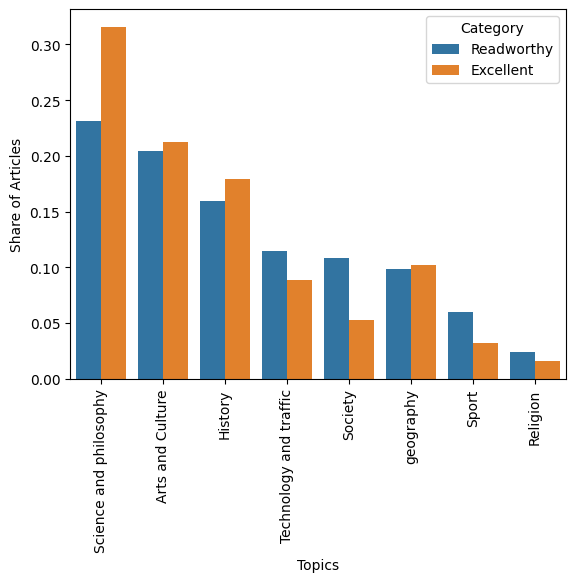

In [21]:
# Convert the dictionaries to pandas DataFrames
read_df = pd.DataFrame(list(readworthy_topics.items()), columns=['Topic', 'Value'])
read_df['Source'] = 'Dict 1'
exc_df = pd.DataFrame(list(excellent_topics.items()), columns=['Topic', 'Value'])
exc_df['Source'] = 'Dict 2'

# Calculate the total count for each dataframe
total_count_read = read_df['Value'].sum()
total_count_exc = exc_df['Value'].sum()

# Calculate the shares of the total for each dataframe
read_df['share'] = read_df['Value'] / total_count_read
exc_df['share'] = exc_df['Value'] / total_count_exc

# Add a 'source' column to identify the dataframes
read_df['Category'] = 'Readworthy'
exc_df['Category'] = 'Excellent'

# Concatenate the dataframes
combined_df = pd.concat([read_df, exc_df], axis=0)

sorting_order = read_df.sort_values('share',ascending=False)['Topic'].tolist()

# Create a seaborn barplot
sns.barplot(data=combined_df, x='Topic', y='share', hue='Category',order = sorting_order)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set axis labels
plt.xlabel('Topics')
plt.ylabel('Share of Articles')

# Show the plot
plt.show()

In [103]:
print(readworthy_topics.keys())

dict_keys(['Geographie', 'Geschichte', 'Gesellschaft', 'Kunst und Kultur', 'Religion', 'Sport', 'Technik und Verkehr', 'Wissenschaft und Philosophie'])


In [73]:
print(split_text[16])

 Städte in Deutschland, Österreich und der Schweiz:</b>
<a href="/wiki/Aarau" title="Aarau">Aarau</a> ·
                                                        <a href="/wiki/Apolda" title="Apolda">Apolda</a> ·
                                                        <a href="/wiki/Arbon" title="Arbon">Arbon</a> ·
                                                        <span class="noprint noviewer"><span aria-hidden="true" role="presentation"><a class="image" href="/wiki/Datei:Loudspeaker.svg" title="Gesprochener Inhalt"><img alt="" data-file-height="20" data-file-width="20" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Loudspeaker.svg/12px-Loudspeaker.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Loudspeaker.svg/18px-Loudspeaker.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Loudspeaker.svg/24px-Loudspeaker.svg.png 2x" width="12"/></a></span></span> <a href="/wiki/Augsburg" title="Augsburg">Augsburg</a> 

{'Gewässer:\nAlmsee ·\n                                                        Altausseer\n                                                            See ·\n                                                         Amper ·\n                                                        Bäke\n                                                            (Telte) ·\n                                                        Blabbergraben ·\n                                                        Bullengraben ·\n                                                        Dornbirner\n                                                            Ach ·\n                                                        Elbe ·\n                                                         Elsterwerda-Grödel-Floßkanal\n                                                        ·\n                                                        Europäisches Nordmeer ·\n                                                        Große Dhünntalsp

{'categories': 0, 'topics': 16547}
